In [1]:
def simple_g2p(word):
    word = word.lower()
    phoneme_sequence = []
    i = 0

    while i < len(word):
        if i < len(word) - 1 and word[i:i+2] == 'th':
            phoneme_sequence.append('DH')
            i += 2
        elif word[i] == 'c':
            if i + 1 < len(word) and word[i+1] in ['e', 'i', 'y']:
                phoneme_sequence.append('S')
            else:
                phoneme_sequence.append('K')
            i += 1
        elif i < len(word) - 1 and word[i] == word[i+1].lower() and word[i].isalpha():
            phoneme_sequence.append(word[i].upper())
            i += 2
        else:
            phoneme_sequence.append(word[i].upper())
            i += 1

    # Handle exception
    if word == 'the':
        phoneme_sequence = ['DH', 'AH']

    return phoneme_sequence





In [2]:
# Test the function
test_words = ['cat', 'cent', 'apple', 'the', 'book', 'tree']
for word in test_words:
    phonemes = simple_g2p(word)
    print(f"Word: {word} -> Phonemes: {'-'.join(phonemes)}")

Word: cat -> Phonemes: K-A-T
Word: cent -> Phonemes: S-E-N-T
Word: apple -> Phonemes: A-P-L-E
Word: the -> Phonemes: DH-AH
Word: book -> Phonemes: B-O-K
Word: tree -> Phonemes: T-R-E


In [6]:
def simple_g2p_with_duration(word):
    word = word.lower()
    phoneme_sequence = []
    durations = []

    vowels = 'aeiou'
    base_vowel_duration = 100
    base_consonant_duration = 50
    final_syllable_increase = 20

    i = 0
    while i < len(word):
        if i < len(word) - 1 and word[i:i+2] == 'th':
            phoneme = 'DH'
            i += 2
        elif word[i] == 'c':
            if i + 1 < len(word) and word[i+1] in vowels:
                phoneme = 'S'
            else:
                phoneme = 'K'
            i += 1
        elif i < len(word) - 1 and word[i] == word[i+1] and word[i].isalpha():
            phoneme = word[i].upper()
            i += 2
        else:
            phoneme = word[i].upper()
            i += 1

        phoneme_sequence.append(phoneme)

        if phoneme.lower() in vowels:
            durations.append(base_vowel_duration)
        else:
            durations.append(base_consonant_duration)
    if durations:
        durations[-1] += final_syllable_increase


    if word == 'the':
        phoneme_sequence = ['DH', 'AH']
        durations = [base_consonant_duration, base_vowel_duration + final_syllable_increase]

    return phoneme_sequence, durations




In [7]:

test_words = ['cat', 'apple', 'hello']
for word in test_words:
    phonemes, durs = simple_g2p_with_duration(word)
    print(f"Word: {word} -> Phonemes: {'-'.join(phonemes)} -> Durations (ms): {durs}")


[50, 100, 50]
Word: cat -> Phonemes: S-A-T -> Durations (ms): [50, 100, 70]
[100, 50, 50, 100]
Word: apple -> Phonemes: A-P-L-E -> Durations (ms): [100, 50, 50, 120]
[50, 100, 50, 100]
Word: hello -> Phonemes: H-E-L-O -> Durations (ms): [50, 100, 50, 120]


pesody

In [8]:
import numpy as np
import random

def calculate_prosody(phoneme_sequence):
    stress = []
    duration = []
    pitch = []
    loudness = []

    vowels = 'aeiou'
    base_vowel_duration = 150  # milliseconds
    base_consonant_duration = 80  # milliseconds

    for phoneme in phoneme_sequence:
        # Stress: Randomly assign stress to phonemes (simplified model)
        stress.append(random.choice([0, 1]))

        # Duration: Vowels last longer than consonants
        if phoneme.lower() in vowels:
            duration.append(base_vowel_duration)
        else:
            duration.append(base_consonant_duration)

        # Pitch: Randomize pitch between 100 Hz and 300 Hz
        pitch.append(random.randint(100, 300))

        # Loudness: Random loudness between 60 and 80 dB
        loudness.append(random.randint(60, 80))

    return stress, duration, pitch, loudness


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_prosody(word, phonemes, durations, pitch, stress, loudness):
    x = np.arange(len(phonemes))

    plt.figure(figsize=(12, 10))
    plt.suptitle(f'Prosodic Features for "{word}"', fontsize=16, weight='bold')

    # Duration
    plt.subplot(4, 1, 1)
    plt.bar(x, durations, tick_label=phonemes, color='#66b3ff', edgecolor='black')
    plt.title('Duration (ms)', fontsize=12)
    plt.ylabel('Time (ms)')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Pitch
    plt.subplot(4, 1, 2)
    plt.plot(x, pitch, 'o-', color='orange', linewidth=2)
    plt.xticks(x, phonemes)
    plt.title('Pitch (Hz)', fontsize=12)
    plt.ylabel('Hz')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Stress
    plt.subplot(4, 1, 3)
    plt.bar(x, stress, tick_label=phonemes, color='green', edgecolor='black')
    plt.title('Stress (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel('Binary')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Loudness
    plt.subplot(4, 1, 4)
    plt.bar(x, loudness, tick_label=phonemes, color='purple', edgecolor='black')
    plt.title('Loudness (dB)', fontsize=12)
    plt.xlabel('Phonemes')
    plt.ylabel('dB')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


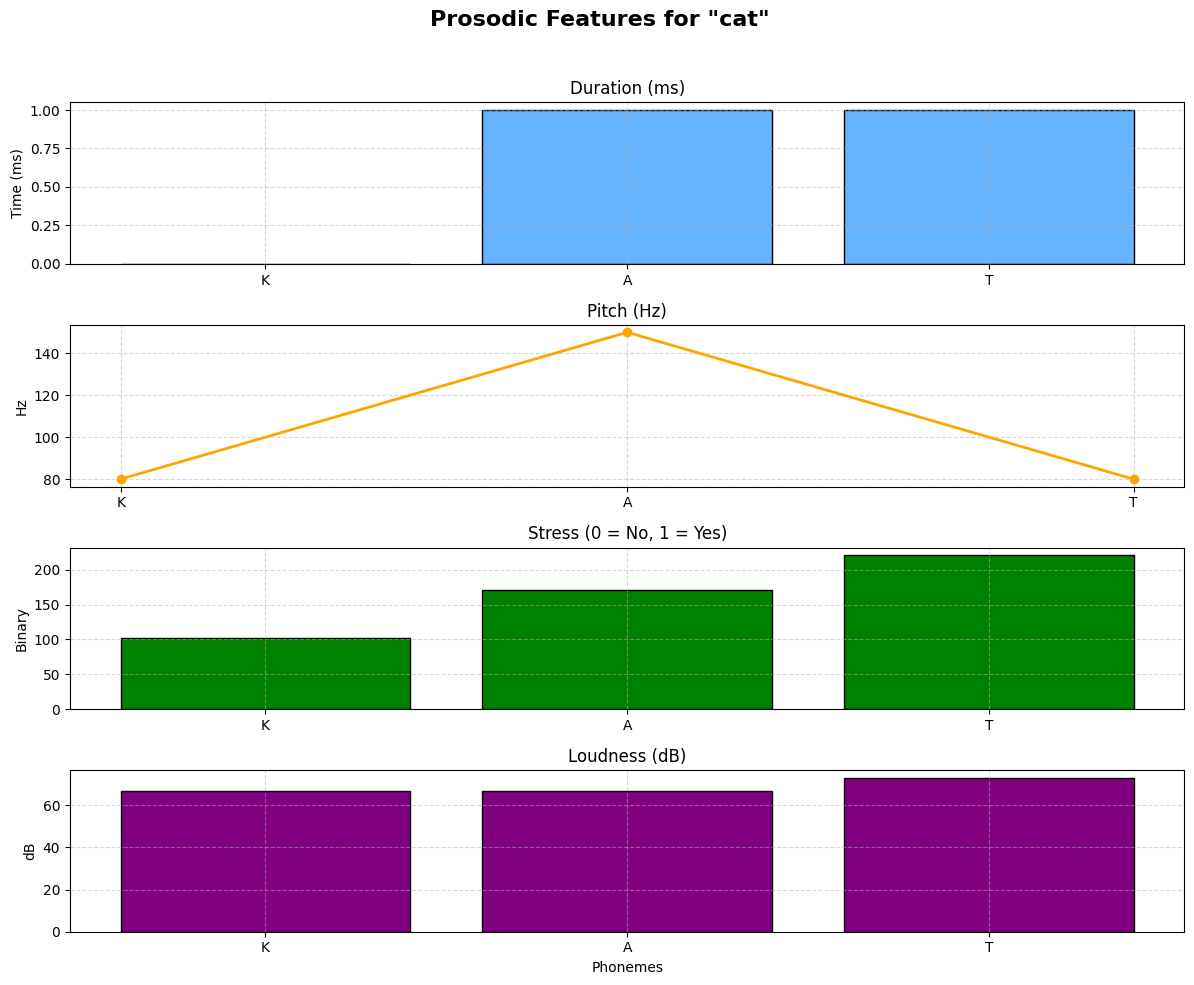

In [26]:
# Step 1: Perform G2P Mapping
word = "cat"  # Example word
phoneme_sequence = simple_g2p(word)

# Step 2: Calculate Prosodic Features (Stress, Duration, Pitch, Loudness)
stress, duration, pitch, loudness = calculate_prosody(phoneme_sequence)

# Step 3: Visualize Prosodic Features
visualize_prosody(word,phoneme_sequence, stress, duration, pitch, loudness)
